<a href="https://colab.research.google.com/github/Lucas-Maced0/Salvando-form-com-JS-PHP-e-SQL/blob/main/Projeto_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

importando o dataset

In [ ]:
dados = pd.read_csv("ds_salaries.csv")

Mostrando os dados das colunas "rank" e "nome"

In [ ]:
dados

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,Senior,Full-Time,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,Intermediate,Contract,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,Intermediate,Contract,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,Senior,Full-Time,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,Senior,Full-Time,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,Senior,Full-Time,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,Intermediate,Full-Time,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,Junior,Full-Time,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,Junior,Contract,Business Data Analyst,100000,USD,100000,US,100,US,L


# Gráfico de Barras:

In [ ]:
anos = dados['work_year']
salarios = dados['salary']
experiencia = dados['experience_level']

In [ ]:
dados
profissoes = dados['job_title']
print (profissoes)

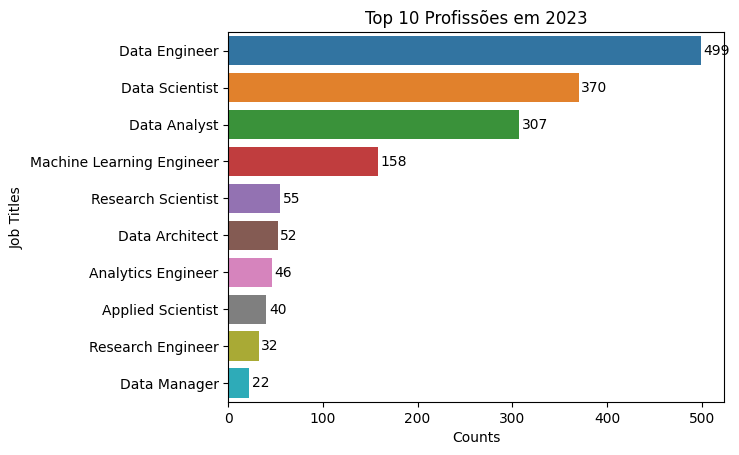

In [ ]:
jobs = dados[dados['work_year']==2023]['job_title'].value_counts().nlargest(10).reset_index()
fig, ax = plt.subplots()
ax = sns.barplot(ax = ax, data = jobs , y = jobs['index'], x = jobs.job_title)
#definindo o título dos gráficos e dos eixos
ax.set(ylabel='Job Titles',xlabel='Counts', title='Top 10 Profissões em 2023');
#inserindo os rótulos
ax.bar_label(ax.containers[0], padding = 2);

In [ ]:
dados['experience_level'].unique()

array(['SE', 'MI', 'EN', 'EX'], dtype=object)

Trocando as siglas das profissões por nomes completos:

In [ ]:
dados['experience_level'] = dados['experience_level'].replace('Entry-level/Junior','Junior')
dados['experience_level'] = dados['experience_level'].replace('Mid-level/Intermediate','Intermediate')
dados['experience_level'] = dados['experience_level'].replace('Senior-level','Senior')
dados['experience_level'] = dados['experience_level'].replace('Executive-level/Director','Director')

In [ ]:
dados['experience_level'].unique()

array(['Senior-level', 'Intermediate', 'Junior', 'Director'], dtype=object)

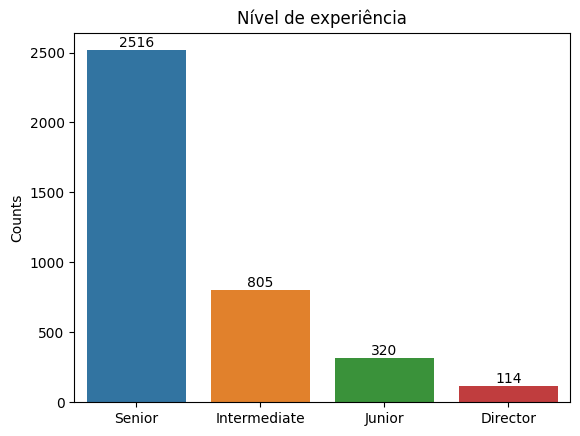

In [ ]:
fig, ax = plt.subplots()
sns.countplot(ax = ax, data = dados, x = dados.experience_level)
ax.set(xlabel='', ylabel='Contagem', title='Nível de experiência')
ax.bar_label(ax.containers[0]);

# Gráfico de Linhas:

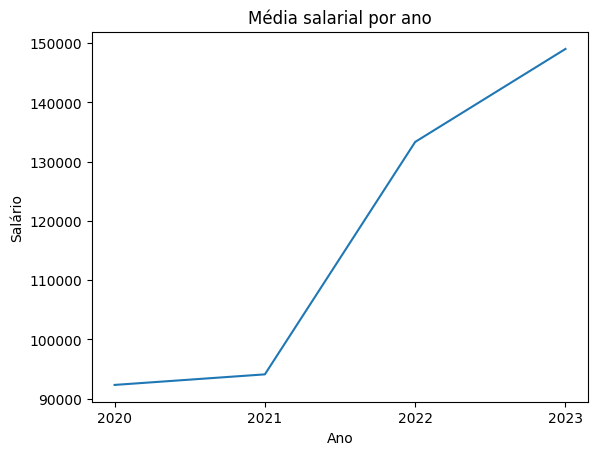

In [ ]:
year_based_salary=dados['salary_in_usd'].groupby(dados['work_year']).mean()
plt.title("Média salarial por ano")
plt.xlabel('Ano')
plt.ylabel('Salário')
sns.lineplot(x=['2020', '2021', '2022','2023'],y=year_based_salary)
plt.show()

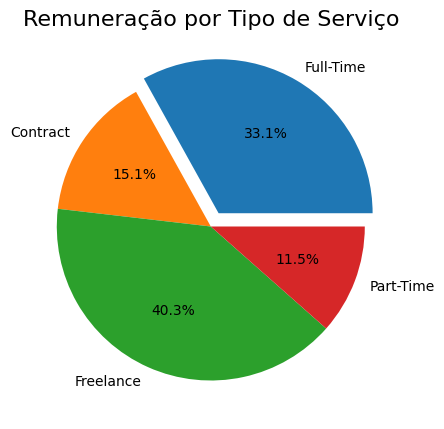

In [ ]:
mediaPorAno=dados['salary_in_usd'].groupby(dados['employment_type']).mean()
labels=dados['employment_type'].unique()

fig,ax = plt.subplots(figsize=(12,5))

explode = (0.1, 0, 0, 0)
ax.pie(mediaPorAno, labels=labels, explode=explode, autopct="%.1f%%");
ax.set_title('Remuneração por Tipo de Serviço', fontsize =16);